<a href="https://colab.research.google.com/github/ecanaan16/data_bowl/blob/assignment2/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13
13


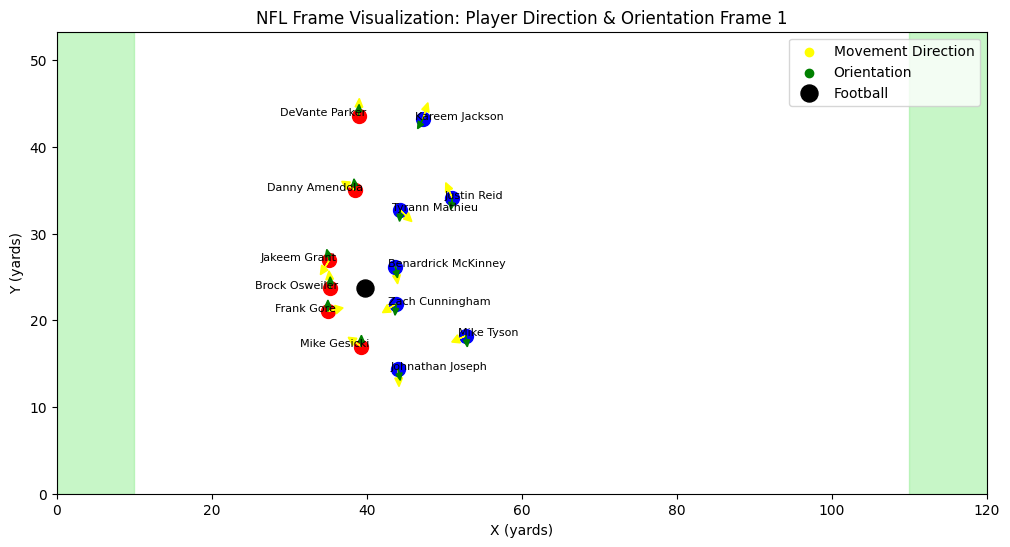

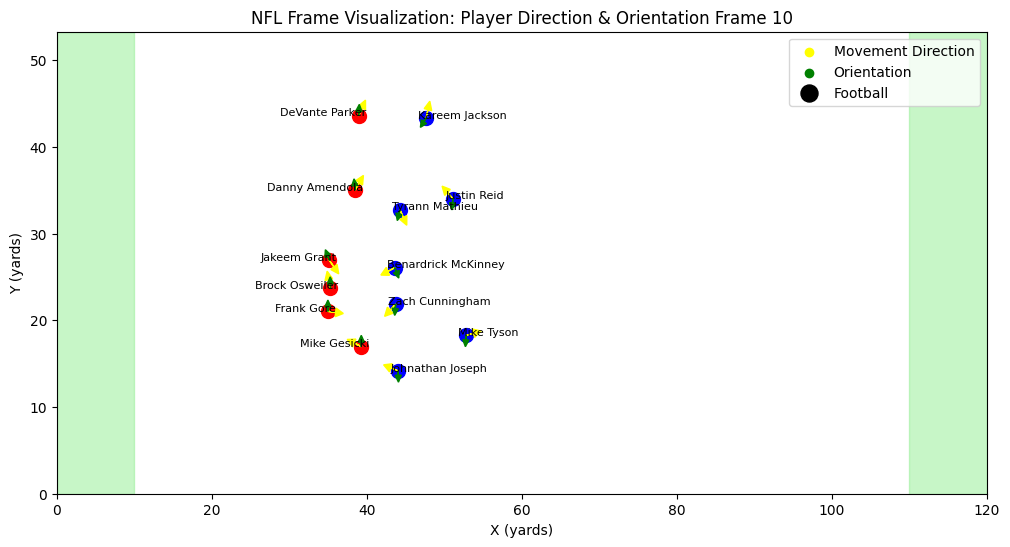

In [48]:
#task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

week8 = pd.read_csv("week8.csv")

filter = week8[(week8["gameId"] == 2018102500) &
                  (week8["playId"] == 103)].copy()

filtered1 = week8[(week8["gameId"] == 2018102500) &
                  (week8["playId"] == 103) &
                  (week8["frameId"] == 1)].copy()

filtered10 = week8[(week8["gameId"] == 2018102500) &
                  (week8["playId"] == 103) &
                  (week8["frameId"] == 10)].copy()



print(filtered1["nflId"].nunique())

print(filtered10["nflId"].nunique())


#task 2
def standardize_coords(row):
  if row["playDirection"] == "left":
    row["x_std"] = 120 - row["x"]

  else:
    row["x_std"] = row["x"]

  row["y_std"] = row["y"]

  return row

filtered1 = filtered1.apply(standardize_coords, axis = 1)
filtered10 = filtered10.apply(standardize_coords, axis = 1)

team_colors = {
    "home" : "blue",
    "away" : "red",
    "ball" : "black"
}

colors = filtered1["team"].map(team_colors).fillna("gray")

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.axvspan(0, 10, color='lightgreen', alpha=0.5)
ax.axvspan(110, 120, color='lightgreen', alpha=0.5)


for idx, row in filtered1.iterrows():
    if row['team'] == 'football':
        # ax.scatter(row['x_std'], row['y_std'], color='black', s=150, label='Football' if idx==filtered1.index[0] else "")
        continue

    # Player scatter point
    ax.scatter(row['x_std'], row['y_std'], color=team_colors.get(row['team'], 'gray'), s=100)

    if not np.isnan(row['dir']):
        dx = np.cos(np.radians(row['dir']))
        dy = np.sin(np.radians(row['dir']))
        ax.arrow(row['x_std'], row['y_std'], dx, dy, head_width=1, head_length=1, fc='yellow', ec='yellow')

    # Orientation arrow (smaller, green)
    if not np.isnan(row['o']):
        dx_o = np.cos(np.radians(row['o'])) * 0.5
        dy_o = np.sin(np.radians(row['o'])) * 0.5
        ax.arrow(row['x_std'], row['y_std'], dx_o, dy_o, head_width=0.8, head_length=0.8, fc='green', ec='green')


    if row['team'] == 'home':  # blue dots
      ax.text(row['x_std']-1, row['y_std'], row['displayName'], fontsize=8, ha='left')
    elif row['team'] == 'away':  # red dots
      ax.text(row['x_std']+1, row['y_std'], row['displayName'], fontsize=8, ha='right')


ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('NFL Frame Visualization: Player Direction & Orientation Frame 1')

ax.scatter([], [], color='Yellow', label='Movement Direction')
ax.scatter([], [], color='green', label='Orientation')
ax.scatter([], [], color='black', s=150, label='Football')
ax.legend(loc='upper right')



fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.set_xlim(0, 120)
ax2.set_ylim(0, 53.3)
ax2.axvspan(0, 10, color='lightgreen', alpha=0.5)
ax2.axvspan(110, 120, color='lightgreen', alpha=0.5)

for idx, row in filtered10.iterrows():
    if row['team'] == 'football':
        ax.scatter(row['x_std'], row['y_std'], color='black', s=150, label='Football' if idx==filtered10.index[0] else "")
        continue

    # Player scatter point
    ax2.scatter(row['x_std'], row['y_std'], color=team_colors.get(row['team'], 'gray'), s=100)

    if not np.isnan(row['dir']):
        dx = np.cos(np.radians(row['dir']))
        dy = np.sin(np.radians(row['dir']))
        ax2.arrow(row['x_std'], row['y_std'], dx, dy, head_width=1, head_length=1, fc='yellow', ec='yellow')

    # Orientation arrow (smaller, green)
    if not np.isnan(row['o']):
        dx_o = np.cos(np.radians(row['o'])) * 0.5
        dy_o = np.sin(np.radians(row['o'])) * 0.5
        ax2.arrow(row['x_std'], row['y_std'], dx_o, dy_o, head_width=0.8, head_length=0.8, fc='green', ec='green')


    if row['team'] == 'home':  # blue dots
      ax2.text(row['x_std']-1, row['y_std'], row['displayName'], fontsize=8, ha='left')
    elif row['team'] == 'away':  # red dots
      ax2.text(row['x_std']+1, row['y_std'], row['displayName'], fontsize=8, ha='right')



ax2.set_xlabel('X (yards)')
ax2.set_ylabel('Y (yards)')
ax2.set_title('NFL Frame Visualization: Player Direction & Orientation Frame 10')


ax2.scatter([], [], color='Yellow', label='Movement Direction')
ax2.scatter([], [], color='green', label='Orientation')
ax2.scatter([], [], color='black', s=150, label='Football')
ax2.legend(loc='upper right')



plt.show()




In [49]:

print(filtered1.head())
ball = filtered1[filtered1['team'] == 'football'].iloc[0]
ball_x, ball_y = ball['x_std'], ball['y_std']

players = filtered1[filtered1["team"] != "football"].copy()

players['x_rel'] = players['x_std'] - ball_x
players['y_rel'] = players['y_std'] - ball_y

def classify_position(x_rel):
    if x_rel < 0:
        return 'Backfield'
    elif x_rel > 0:
        return 'Downfield'
    else:
        return 'At Ball'

players['field_position'] = players['x_rel'].apply(classify_position)


summary = players['field_position'].value_counts().reset_index()
summary.columns = ['Position', 'Player Count']

print("\nSummary of positions relative to ball (Frame 1):")
print(summary)



                       time      x      y     s     a   dis       o     dir  \
0  2018-10-26T00:27:01.200Z  38.47  35.03  0.00  0.00  0.00   96.28  149.52   
1  2018-10-26T00:27:01.200Z  47.22  43.22  0.43  0.66  0.04  238.49   70.93   
2  2018-10-26T00:27:01.200Z  44.05  14.36  0.15  1.01  0.02  281.24  272.67   
3  2018-10-26T00:27:01.200Z  34.97  21.04  0.00  0.00  0.00   90.20   11.64   
4  2018-10-26T00:27:01.200Z  35.29  23.72  0.00  0.00  0.00   90.94   95.36   

   event      nflId  ... jerseyNumber  position frameId  team      gameId  \
0    NaN     2649.0  ...         80.0        WR       1  away  2018102500   
1    NaN   496735.0  ...         25.0        CB       1  home  2018102500   
2    NaN  2495872.0  ...         24.0        CB       1  home  2018102500   
3    NaN  2506404.0  ...         21.0        RB       1  away  2018102500   
4    NaN  2533436.0  ...          8.0        QB       1  away  2018102500   

   playId  playDirection  route  x_std  y_std  
0     103     